In [ ]:
from sklearn.datasets import load_iris
import pandas as pd


In [ ]:
iris = load_iris()
classes=list(iris.target_names)
# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [ ]:
df = df[df['target']!=2 ]

<Figure size 432x288 with 0 Axes>

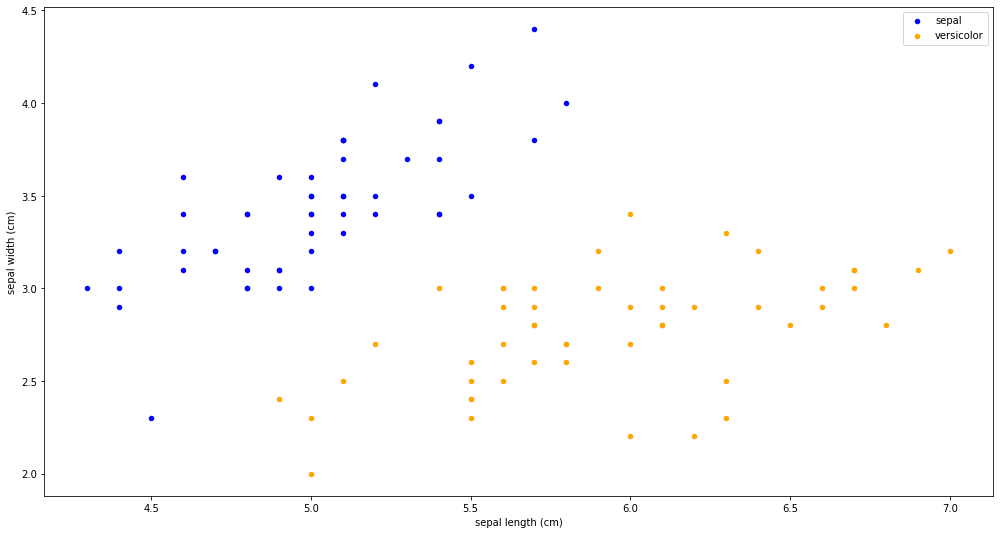

In [ ]:

import matplotlib.pyplot as plt
plt.figure()
fig,ax=plt.subplots(figsize=(17, 9))
df[df['target']==0].plot(x="sepal length (cm)",y="sepal width (cm)",kind="scatter",ax=ax,sharex=False,sharey=False,label="sepal",color='blue')
df[df['target']==1].plot(x="sepal length (cm)",y="sepal width (cm)",kind="scatter",ax=ax,sharex=False,sharey=False,label="versicolor",color='orange')

In [ ]:
Y=df['target'].values
X=df.drop(['petal length (cm)',	'petal width (cm)', 'target'],axis=1).values
Y = np.reshape(Y, (Y.shape[0], 1))

In [ ]:
import random 
import math
import numpy as np
def test_train_split(data,tags,percent):
  shuffler = np.random.permutation(len(data))
  data_shuffled = data[shuffler]
  tags_shuffled = tags[shuffler]
  x_train=data_shuffled[:int(len(data)*percent)]
  y_train=tags_shuffled[:int(len(data)*percent)]
  x_test=data_shuffled[int(len(data)*percent)+1:]
  y_test=tags_shuffled[int(len(data)*percent)+1:]
  return x_train,y_train,x_test,y_test
x_train,y_train,x_test,y_test=test_train_split(X,Y,0.8)

In [ ]:
y_train=np.where( y_train > 0, 1, -1)
y_test=np.where( y_test > 0, 1, -1)

In [ ]:
def sigmoid(x):
     return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
     return x * (1 - x)
def step(x):
  return np.where( x > 0, 1, -1)
class Percetron():
  def __init__(self,data,tags):
    self.train_data=data
    self.train_tags=tags
    self.Weights=np.random.random((x_train.shape[1]))
    self.Bias=1
  def fit(self, epouch,alpha):
    for _ in range(epouch):
      for i in range(x_train.shape[0]):
        #x = np.reshape(x_train[i], (x_train[i].shape[0], 1))
        predicted=np.dot(x_train[i],self.Weights)+self.Bias
        Error=self.train_tags[i]-step(predicted)
        self.Weights=self.Weights+alpha*Error*x_train[i]
        self.Bias=self.Bias+alpha*Error
      
    return self.Weights,self.Bias
  def predcit(self,test_data):
    predicted=step(np.dot(test_data,self.Weights)+self.Bias)
    return predicted
  def accuracy(self,x_test,y_test):
    k=0
    for i in range(x_test.shape[0]):
      pred=self.predcit(x_test[i])
      if(pred[0]==y_test[i]):
          k=k+1
    return k/x_test.shape[0]


In [ ]:
import random
import numpy as np
NN=Percetron(x_train,y_train)
W,B=NN.fit(100,0.1)
NN.accuracy(x_test,y_test)

1.0

Slope= 0.6142214557837571  Intercept= [-0.25197169]


<Figure size 432x288 with 0 Axes>

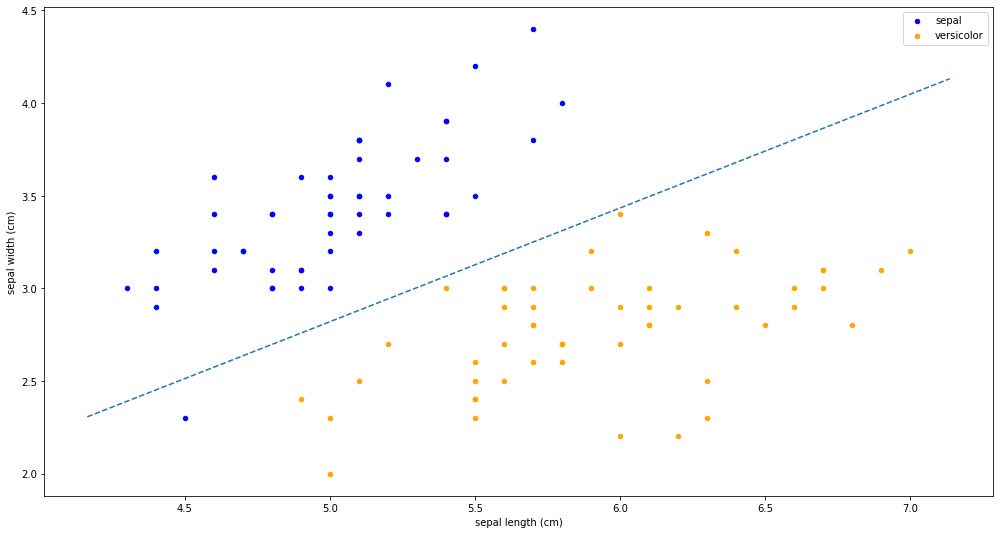

In [ ]:

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df = df[df['target']!=2 ]
plt.figure()
fig,ax=plt.subplots(figsize=(17, 9))
df[df['target']==0].plot(x="sepal length (cm)",y="sepal width (cm)",kind="scatter",ax=ax,sharex=False,sharey=False,label="sepal",color='blue')
df[df['target']==1].plot(x="sepal length (cm)",y="sepal width (cm)",kind="scatter",ax=ax,sharex=False,sharey=False,label="versicolor",color='orange')
Slop=-W[0]/W[1]
abline(Slop,-B/W[1])
print("Slope=",Slop," Intercept=",-B/W[1])